<a href="https://colab.research.google.com/github/rawatpranjal/AlgorithmicCompetition/blob/main/Differentiated_Bertrand_Seasonal_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Differentiated Bertrand Duopoly with Seasonal Demand**

- Each firm has two states - (1) opponents' last price and (2) state of the economy. 
- In booming state, demand is inelastic and firms can charge a higher price.
- In recession state, demand is elastic and firms need to lower prices. 
- Firm knows about state of economy before the period starts.

In [299]:
# parameters of game
import numpy as np
np.set_printoptions(precision=10)

a1 = 10
a2 = 10
a0 = 4
mu = 0.25

def demand(price1,price2,economy):
    a = np.exp((a1-price1)/mu)
    b = np.exp((a2-price2)/mu)
    c = np.exp((a0*economy)/mu)
    return a/(a+b+c)

def profit(price1,price2,economy):
  return (price1-c)*(demand(price1,price2,economy))

profit(3,3,1)

0.9999969279032611

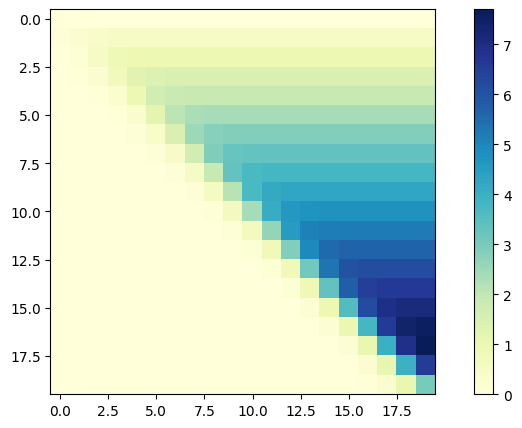

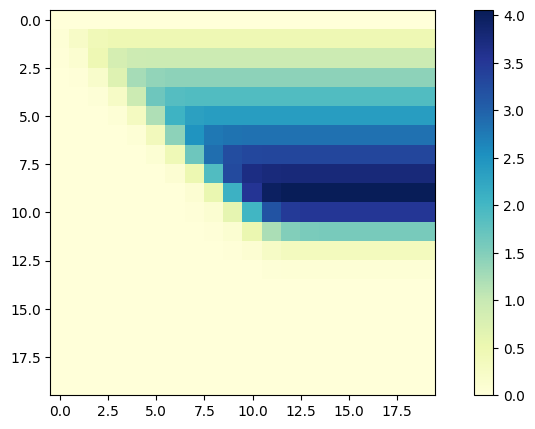

In [300]:
# initialize the reward matrix
num_states = 20
num_seasons = 2
num_actions = 20 #0 producing highest quantity
action2price = np.linspace(1,10,num_actions)

import numpy as np

reward = np.zeros((num_actions, num_actions, num_seasons))
for i in range(reward.shape[0]):
    for j in range(reward.shape[1]):
      for k in range(reward.shape[2]):
        reward[i, j, k] = profit(action2price[i],action2price[j],k)

import matplotlib.pyplot as plt
plt.imshow(reward[:,:,0], cmap='YlGnBu', interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(reward[:,:,1], cmap='YlGnBu', interpolation='nearest')
plt.colorbar()
plt.show()

In [301]:
import random
import numpy as np

# initialize parameters
gamma = 0.9
alpha = 0.1
initial_temperature = 10.0
temperature_decay = 0.999999
min_temperature = 0.0001
temperature = initial_temperature
initial_eps = 1.0
eps_decay = 0.999999
min_eps = 0.0001
eps = initial_eps

# define the Boltzmann action selection function
def boltzmann_action_selection(Q, state, season, temperature):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state,season])
    logits = (Q[state,season] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    # select an action using the computed probabilities
    action = np.random.choice(range(len(probs)), p=probs)
    return action

# initialize the Q-table
Q1 = np.ones((num_states, num_seasons, num_actions))
Q2 = np.ones((num_states, num_seasons, num_actions))
agent1_history = []
agent2_history = []

In [327]:
# run Boltzmann Q-learning for a fixed number of episodes
# initialize the state
state1 = 1
state2 = 1
season = 0
num_episodes = 1000000
for episode in range(num_episodes):

    # take the exploratory action
    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action1 = boltzmann_action_selection(Q1, state1,season,temperature)
    else:
        action1 = np.random.choice(range(num_actions))

    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action2 = boltzmann_action_selection(Q2, state2,season, temperature)
    else:
        action2 = np.random.choice(range(num_actions))

    # collect rewards
    reward1 = reward[action1,action2,season]
    reward2 = reward[action2,action1,season]

    # observe the next state and season
    next_state1 = action2
    next_state2 = action1
    if season == 0:
      next_season = 1
    else:
      next_season = 0

    # update the Q-value for the selected action in the current state
    Q1[state1,season][action1] =  (1-alpha)*Q1[state1,season][action1] + alpha * (reward1 + gamma * np.max(Q1[next_state1,next_season]))
    Q2[state2,season][action2] =  (1-alpha)*Q2[state2,season][action2] + alpha * (reward2 + gamma * np.max(Q2[next_state2,next_season]))

    # move to the next state and season
    state1 = next_state1
    state2 = next_state2
    season = next_season

    # update temperature
    temperature = max(min_temperature, temperature * temperature_decay)
    eps = max(min_eps, eps * eps_decay)

    if episode%10000==0:
      print('\n',episode, temperature, eps)
      print(np.mean([boltzmann_action_selection(Q1, 1,season,temperature) for i in range(100)]), np.mean([boltzmann_action_selection(Q2, 1,season,temperature) for i in range(100)]))
      print(np.mean([boltzmann_action_selection(Q1, 0,season,temperature) for i in range(100)]), np.mean([boltzmann_action_selection(Q2, 0,season,temperature) for i in range(100)]))
    
    agent1_history.append(action1)
    agent2_history.append(action2)


 0 0.06737923415329267 0.006737923415328637
2.0 2.0
9.0 2.0

 10000 0.0667087992380502 0.00667087992380441
2.0 2.0
9.0 2.0

 20000 0.06604503526499324 0.00660450352649879
2.0 2.0
9.0 2.0

 30000 0.06538787585710643 0.006538787585710098
2.0 2.0
9.0 2.0

 40000 0.06473725529783433 0.006473725529782909
2.0 2.0
9.0 2.0

 50000 0.06409310852451357 0.006409310852450896
2.0 2.0
9.0 2.0

 60000 0.06345537112186662 0.0063455371121862525
2.0 2.0
9.0 2.0

 70000 0.062823979315558 0.0062823979315553575
3.25 1.29
4.88 3.94

 80000 0.06219886996581692 0.00621988699658127
3.0 1.0
2.41 2.0

 90000 0.06157998056112567 0.006157998056112144
3.01 6.13
3.14 6.53

 100000 0.060967249211965224 0.006096724921196131
5.92 4.75
4.14 6.31

 110000 0.06036061464462939 0.006036061464462589
5.51 3.96
7.18 8.84

 120000 0.059760016195095765 0.005976001619509211
2.0 2.02
7.72 6.76

 130000 0.05916539380295794 0.005916539380295475
2.0 2.0
4.0 6.0

 140000 0.05857668800542214 0.005857668800541887
2.0 2.0
4.0 6.0

 1500

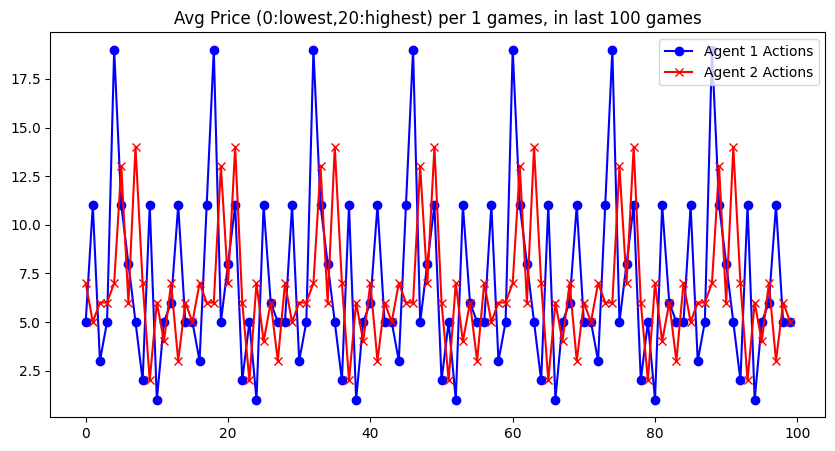

In [343]:
  import matplotlib.pyplot as plt
  plt.rcParams["figure.figsize"] = (10, 5)
  plt.rcParams['font.size']=10
  def moving_average(x, w):
        return np.convolve(x, np.ones(w), 'valid') / w
  plt.plot(moving_average(np.array(agent1_history[-100:]),1), label = 'Agent 1 Actions', marker = 'o', c = 'b')
  plt.plot(moving_average(np.array(agent2_history[-100:]),1), label = 'Agent 2 Actions', marker = 'x', c = 'r')
  plt.title('Avg Price (0:lowest,20:highest) per 1 games, in last 100 games') 
  plt.legend()
  plt.show()

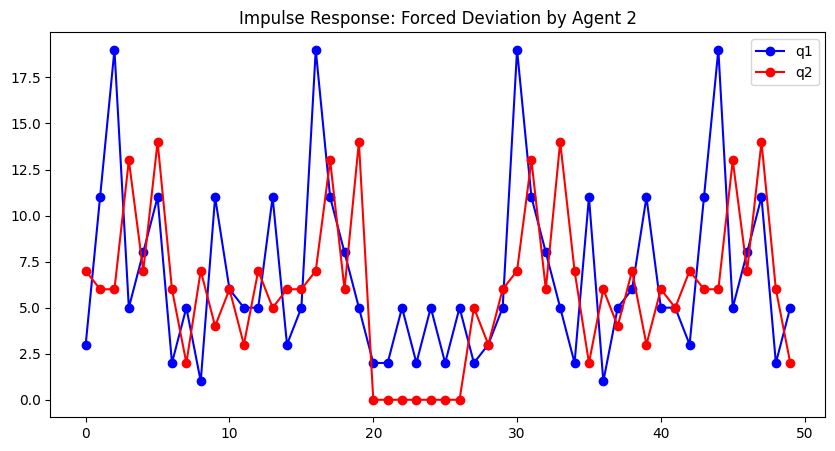

In [344]:
# initialize the state
state1 = 5
state2 = 5
season = 0
q1_impulse=[]
q2_impulse=[]
qm_impulse=[]
# run Boltzmann Q-learning for a fixed number of episodes
num_episodes = 50
for episode in range(num_episodes):
      
    if (episode in [20,21,22,23,24,25,26]): # & (season==1):
        action1 = boltzmann_action_selection(Q1, state1, season,temperature)
        action2 = 0
    else:
        action1 = boltzmann_action_selection(Q1, state1, season, temperature)
        action2 = boltzmann_action_selection(Q2, state2, season, temperature)

    # take the selected action and observe the next state and reward
    next_state1 = action2
    next_state2 = action1

    # collect rewards
    reward1 = reward[action1,action2,season]
    reward2 = reward[action2,action1,season]

    # observe the next state and season
    next_state1 = action2
    next_state2 = action1
    if season == 0:
      next_season = 1
    else:
      next_season = 0

    q1_impulse.append(action1)
    q2_impulse.append(action2)

    # move to the next state and season
    state1 = next_state1
    state2 = next_state2
    season = next_season
    
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
    
import matplotlib.pyplot as plt
plt.plot(moving_average(q1_impulse,1), label='q1', marker = 'o', c = 'b')
plt.plot(moving_average(q2_impulse,1), label='q2',marker = 'o', c = 'r')
plt.legend()
plt.title('Impulse Response: Forced Deviation by Agent 2')
plt.show()

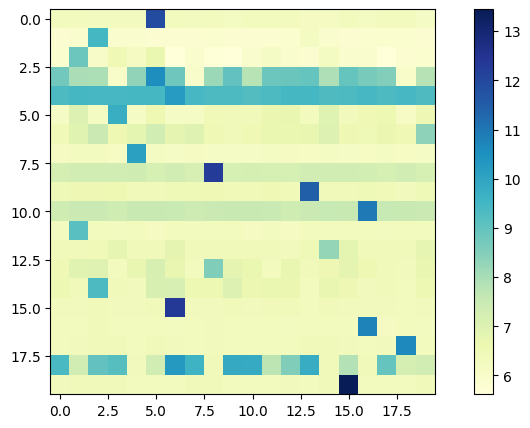

In [335]:
import matplotlib.pyplot as plt
import numpy as np
# Plot heatmap
plt.imshow(Q1[:,0,:], cmap='YlGnBu', interpolation='nearest')
plt.colorbar()
plt.show()


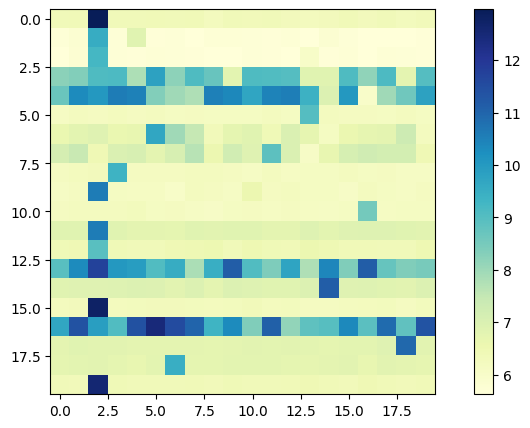

In [336]:
import matplotlib.pyplot as plt
import numpy as np
# Plot heatmap
plt.imshow(Q1[:,1,:], cmap='YlGnBu', interpolation='nearest')
plt.colorbar()
plt.show()
